In [1]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (
                                    StratifiedKFold, 
                                    cross_validate
                                    )
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

### 1. Load the data

In [2]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

### 2. Define Multi Models

In [3]:
models = {
        'Logistic Regression' : LogisticRegression(),
        'Decision Tree' :DecisionTreeClassifier(),
        'Random Forest' : RandomForestClassifier()
        }

### 3. Configure K-Fold CV

In [4]:
cv = StratifiedKFold(
                    n_splits=6,
                    random_state=42,
                    shuffle=True
                    )

In [5]:
trained_models = {}
for model_name, model in models.items():
    print(f"\nCross Validation on {model_name}")

    cv_results = cross_validate(
                                model,
                                X_train, Y_train,
                                cv=cv, scoring='f1',
                                return_estimator=True,
                                return_train_score=False
                                )
    test_scores = cv_results['test_score']
    print(test_scores)
    
    best_index = np.argmax(test_scores)

    estimator = cv_results['estimator'][best_index]
    trained_models[model_name] = estimator


Cross Validation on Logistic Regression
[0.72853828 0.71621622 0.70943396 0.69150943 0.73438245 0.71347249]

Cross Validation on Decision Tree
[0.83317801 0.8342803  0.83403068 0.83504194 0.83190883 0.83317625]

Cross Validation on Random Forest
[0.8979021  0.8979206  0.90567809 0.89771135 0.89216152 0.89393939]


In [6]:
trained_models

{'Logistic Regression': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier()}

In [7]:
Y_hat_tests = {}
for model_name, model in trained_models.items():
    Y_hat_test = model.predict(X_test)
    Y_hat_tests[model_name] = Y_hat_test
Y_hat_tests

{'Logistic Regression': array([1, 0, 1, ..., 1, 0, 0], shape=(2000,)),
 'Decision Tree': array([0, 0, 0, ..., 1, 0, 0], shape=(2000,)),
 'Random Forest': array([0, 0, 0, ..., 1, 0, 1], shape=(2000,))}

In [8]:
cm1 = confusion_matrix(Y_test, Y_hat_tests['Logistic Regression'])
cm2 = confusion_matrix(Y_test, Y_hat_tests['Decision Tree'])
cm3 = confusion_matrix(Y_test, Y_hat_tests['Random Forest'])

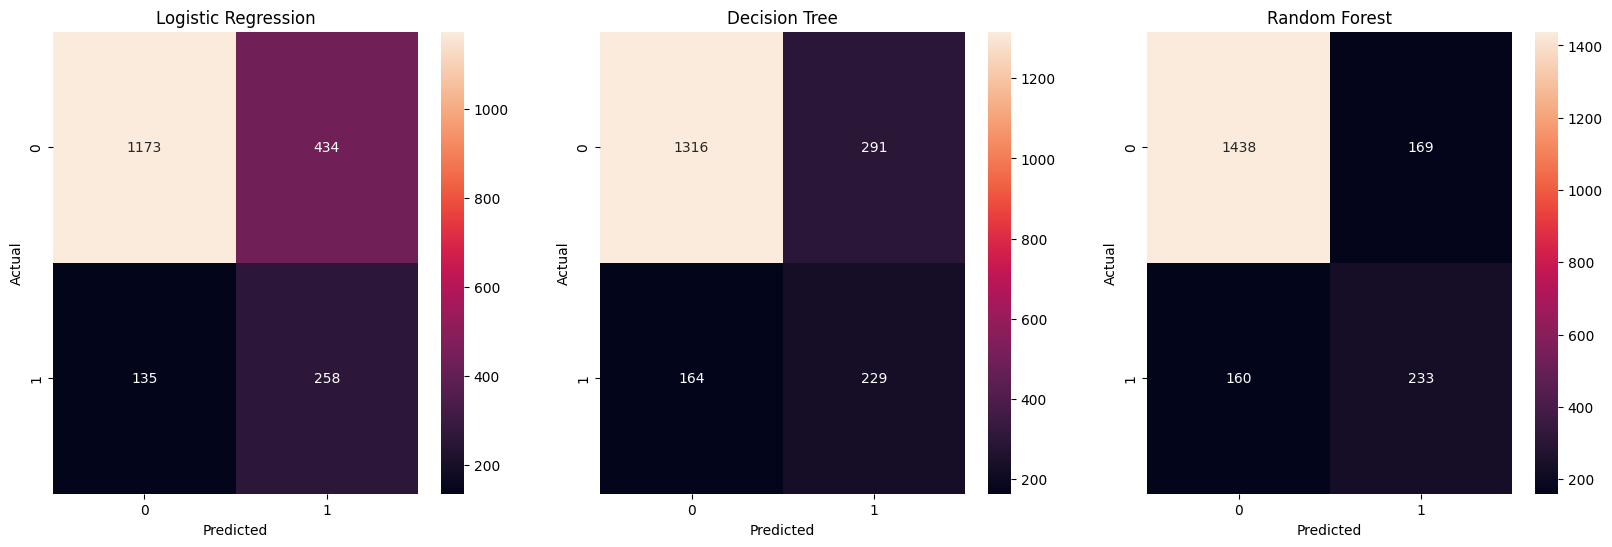

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))

sns.heatmap(cm1, annot=True, fmt='d', ax=ax1)
ax1.set_title('Logistic Regression')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', ax=ax2)
ax2.set_title('Decision Tree')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

sns.heatmap(cm3, annot=True, fmt='d', ax=ax3)
ax3.set_title('Random Forest')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')

plt.show()